In [61]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

Exercise $6.6.1$ is trivial and has solution to part (c) in the solutions manual. Exercise $6.6.2$ is solved in the solutions manual.

#### Exercise 6.6.3. 
For the setup of Exercise $6.6.2$, show that the following estimator of $\theta$ is unbiased: $$ \tilde{\theta}= n^{-1}(X_1 - X_2 - X_3 +X4).$$

For a multinomial distribution, we have $E(X_i) = np_i$, so that $E(\tilde{\theta}) = n^{-1}(np_1-np_2-np_3+np_4) = \theta$. Hence $\tilde{\theta}$ is unbiased.

#### Exercise 6.6.4 . 

Rao (page 368 , 1973) presents data for the situation described in Exercise $6.6.1$. The observed frequencies are $\textbf{x} = (125, 18, 20, 34)′.$

(a) Using computational packages (for example, R), with $(6.6.24)$ as the initial estimate, write a program that obtains the stepwise EM estimates $\hat{\theta}^{(k)}.$

(b) Using the data from Rao, compute the EM estimate of $\theta$ with your program. List the sequence of EM estimates, $\{\hat{\theta}^{(k)}\}$, that you obtained. Did your sequence of estimates converge?

(c) Show that the mle using the likelihood approach in Exercise $6.6.1$ is the positive root of the equation $197\theta^2-15\theta-68 = 0.$ Compare it with your EM solution. They should be the same within roundoff error.


In [62]:
# Solution

x1=125
x2=18
x3=20
x4=34
n=x1+x2+x3+x4

t0 = (x1-x2-x3+x4)/n
ti = t0
tiseq=[t0]
cnt=0
while(cnt<300):
    tip1 = (x1*ti+2*x4+x4*ti)/(n*ti+2*(x2+x3+x4))
    ti = tip1
    tiseq.append(tip1)
    cnt=cnt+1

In [63]:
thisroots = np.roots([197,-15,-68])
print(thisroots[0],tiseq[-1])
if(np.abs(thisroots[0]-tiseq[-1]) < 1e-6):
    print('Sequence converged')
else:
    print('Sequence did not converge')

0.6268214978709825 0.6268214978709825
Sequence converged


In [64]:
for i in range(6):
    res = np.abs(thisroots[0]-tiseq[i])
    print(res,tiseq[i])

0.012608299901439413 0.6142131979695431
0.0016898055043509386 0.6251316923666316
0.0002246498186055934 0.6265968480523769
2.983365451969533e-05 0.6267916642164628
3.961361910387318e-06 0.6268175365090721
5.259861530770849e-07 0.6268209718848294


Solution to $6.6.5$ is given in the solutions manual

#### Exercise 6.6.6

Consider the situation described in Example $6.6.1.$ But suppose we have left censoring. That is, if $Z_1, Z_2, ... , Z_{n2}$ are the censored items, then all we know is that each $Z_j < a$. Obtain the EM algorithm estimate of $\theta$.

Basically expression $(6.6.13)$ changes to $$k(\textbf{z}|\theta,\textbf{x}) = \prod_{i=1}^{n_2}\left( \cfrac{f(z_i-\theta)}{F(a-\theta)} \right)$$ with $z_i < a, ~ \forall i\in\{1,2,\cdots{},n_2\}$. So the marginal pdf of the $Z_j$ is now $f(z-\theta)/F(a-\theta).$ Now expression $(6.6.4)$ changes to $$Q(\theta|\theta_0,\textbf{x}) = \sum_{i=1}^{n_1}\log{f(x_i-\theta)}+n_2\int_{-\infty}^{a}\log{f(z-\theta)}\frac{f(z-\theta_0)}{F(a-\theta_0)}d\textbf{z}.$$

Now expression $(6.6.15)$ changes to $$\frac{\partial{Q(\theta|\theta_0,\textbf{x})}}{\partial{\theta}}=-\left\{ \sum_{i=1}^{n_1}\frac{f'(x_i-\theta)}{f(x_i - \theta)} + +n_2\int_{-\infty}^{a}\frac{f'(z-\theta)}{f(z-\theta)}\frac{f(z-\theta_0)}{F(a-\theta_0)}d\textbf{z} \right\},$$ so expression $(6.6.16)$ from example $6.6.1$ now changes to $$\hat{\theta}^{(m+1)}= \frac{n_1}{n}\bar{x} + \frac{n_2}{n}\hat{\theta}^{(m)} + \frac{n_2}{n}\frac{\phi(a-\hat{\theta}^{(m)})}{\Phi(a-\hat{\theta}^{(m)})}.$$

#### Exercise 6.6.7.

Suppose these data follow the model of Example $6.6.1:$

|||||||||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|2.01|0.74|0.68|1.50$^+$|1.47|1.50$^+$|1.50$^+$|1.52|
|0.07|−0.04|−0.21|0.05|−0.09|0.67|0.14||

where the superscript $^+$ denotes that the observation was censored at $1.50.$ Write a computer program to obtain the EM algorithm estimate of $\theta$.

In [65]:
# This is just an implementation of expression (6.6.16) from the text recursively till convergence is achieved

a=1.5
n=15
n1=12
n2=n-n1

x=[2.01,0.74,0.68,1.47,1.52,0.07,-1*0.04,-1*0.21,0.05,-1*0.09,0.67,0.14]
xb=np.mean(x)
t0=xb

tiseq=[t0]
ti = t0
for i in range(300):
    tip1 = n1/n*xb+n2/n*ti+n2/n*(norm.pdf(a-ti,loc=0,scale = 1)/(1-norm.cdf(a-ti,loc=0,scale = 1)))
    tiseq.append(tip1)
    ti = tip1

In [66]:
tiseq[-5:]

[0.8898257999764785,
 0.8898257999764785,
 0.8898257999764785,
 0.8898257999764785,
 0.8898257999764785]

#### Exercise 6.6.8. 

The following data are observations of the random variable $X = (1 − W)Y_1 + WY_2,$ where $W$ has a Bernoulli distribution with probability of success $0.70$; $Y_1$ has a $N (100, 202)$ distribution; $Y_2$ has a $N (120, 252)$ distribution; $W$ and $Y_1$ are independent; and $W$ and $Y_2$ are independent. Data are in the file mix$668$.rda.

||||||||
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|119.0|96.0|146.2|138.6|143.4|98.2|124.5|
|114.1|136.2|136.4|184.8|79.8|151.9|114.2|
|145.7|95.9|97.3|136.4|109.2|103.2||

Program the EM algorithm for this mixing problem as discussed at the end of the section. Use a dotplot to obtain initial estimates of the parameters. Compute the estimates. How close are they to the true parameters? Note: assuming the R vector $x$ contains the sample on $X$, a quick dotplot in R is computed by plot(rep$(1,20)\tilde{}x$).

In [67]:
data=pd.read_csv('data/mix668.csv')
data = data[['x']].copy()
data.rename(columns={'x': 'X'}, inplace=True)

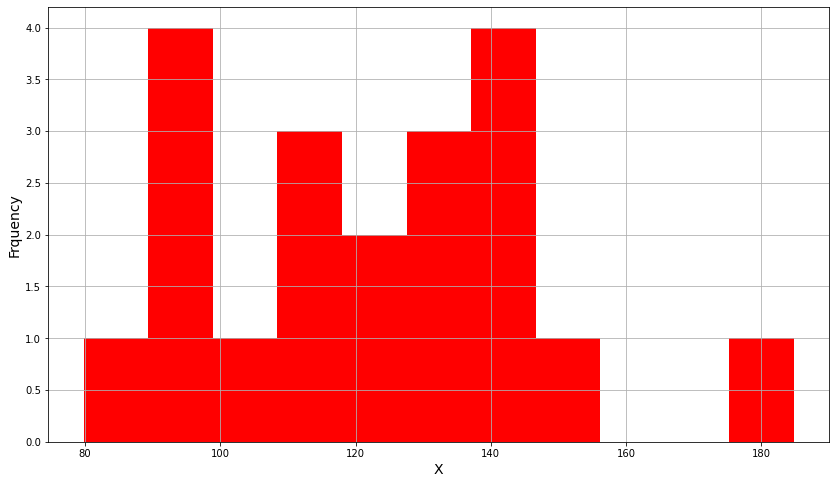

In [74]:
plt.figure(figsize=(14,8))

plt.hist(data['X'],bins=11,color='r',density=False)
plt.xlabel('X',fontsize=14)
plt.ylabel('Frquency',fontsize=14)
plt.grid()
plt.show()

Note that the definition of $\theta$ is given on line right before expression $(6.6.17)$ of the text namely $\theta′ = (\mu_1, \mu_2, \sigma_1, \sigma_2, \epsilon).$

In [69]:
def mixnormal(x, theta0):
    # This Python function returns one iteration of the EM step for Exercise
    # of Chapter 6.
    # The initial estimate for the step is the input vector theta0.
    # R code is from solutions manual, and was converted to python using the following website
    # https://www.codeconvert.ai/r-to-python-converter    
    part1 = (1 - theta0[4]) * norm.pdf(x, theta0[0], theta0[2])
    part2 = theta0[4] * norm.pdf(x, theta0[1], theta0[3])
    gam = part2 / (part1 + part2)
    denom1 = np.sum(1 - gam)
    denom2 = np.sum(gam)
    mu1 = np.sum((1 - gam) * x) / denom1
    sig1 = np.sqrt(np.sum((1 - gam) * ((x - mu1) ** 2)) / denom1)
    mu2 = np.sum(gam * x) / denom2
    sig2 = np.sqrt(np.sum(gam * ((x - mu2) ** 2)) / denom2)
    p = np.mean(gam)
    mixnormal = np.array([mu1, mu2, sig1, sig2, p])
    return mixnormal

In [70]:
t0 = [105,130,15,25,0.6]
ti = t0
for i in range(300):
    tip1 = mixnormal(data['X'],ti)
    ti = tip1

In [71]:
ti

array([ 98.76415204, 133.96194222,   9.87917559,  21.51380755,
         0.70418762])

Following is from the back of the book where answers are given to selected exercises

The R function mixnormal, at site listed in the Preface produced these results: (first row are initial estimates, second row are the estimates after $500$ iterations):

|$\mu_1$|$\mu_2$|$\sigma_1$|$\sigma_2$|$\epsilon$|
|:-:|:-:|:-:|:-:|:-:|
|105.00|130.00|15.00|25.00|0.600|
|98.76|133.96|9.88|21.50|0.704|